In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, AlphaDropout
from keras import optimizers

import tensorflow as tf

import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(1)
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    Z = np.round(Z)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

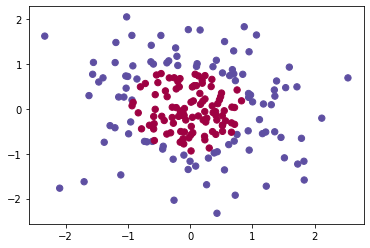

In [3]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [4]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_Y[1] + shape_X[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print (f'No of Examples {m}!')

The shape of X is: (2, 200)
The shape of Y is: (1, 200)
No of Examples 400!


# of hidden nodes: 1
Loss: 0.6928054761886596
Accuracy: 53.0%


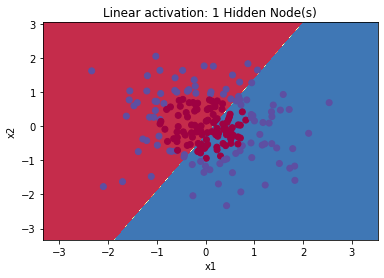

# of hidden nodes: 2
Loss: 0.687276816368103
Accuracy: 54.50000000000001%


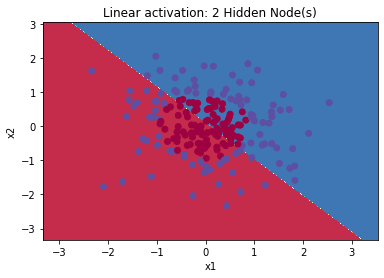

# of hidden nodes: 3
Loss: 0.6872720050811768
Accuracy: 54.0%


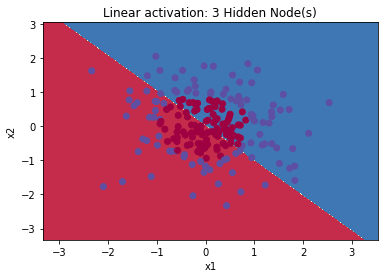

# of hidden nodes: 5
Loss: 0.687320020198822
Accuracy: 54.50000000000001%


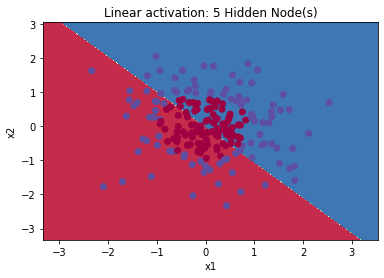

# of hidden nodes: 10
Loss: 0.6873774313926697
Accuracy: 55.50000000000001%


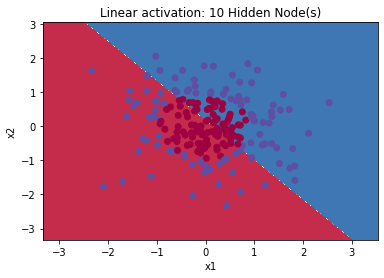

# of hidden nodes: 20
Loss: 0.6872856831550598
Accuracy: 54.50000000000001%


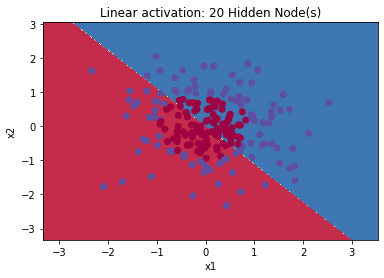

# of hidden nodes: 50
Loss: 0.6873298931121826
Accuracy: 55.50000000000001%


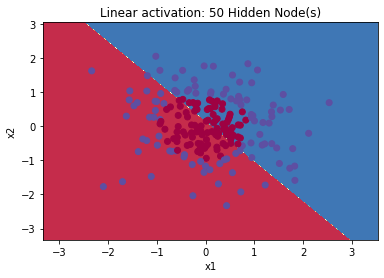

In [12]:
hNodes=[1,2,3,5,10,20,50]

for hNode in hNodes:
    print(f'# of hidden nodes: {hNode}')
    
    model = Sequential([
      Dense(hNode, activation='linear', input_shape=(2,)),
      Dense(1, activation='sigmoid'),
    ])

    model.compile(
      optimizer='sgd',
      loss='binary_crossentropy',
      metrics=['accuracy'],
    )

    model.fit(
      X.T,
      Y.T,
      epochs=500,
      batch_size=32,
      verbose=0
    )

    [loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

    print(f"Loss: {loss}")
    print(f"Accuracy: {100*accuracy}%")
    
    plot_decision_boundary(lambda x: model.predict(x), X, Y)
    plt.title(f"Linear activation: {hNode} Hidden Node(s)")
    plt.show()


# of hidden nodes: 1
Loss: 0.692981972694397
Accuracy: 56.99999999999999%


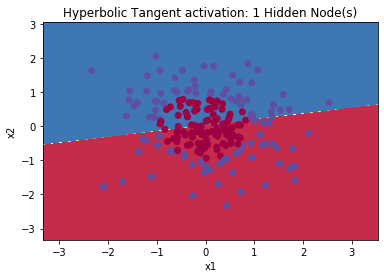

# of hidden nodes: 2
Loss: 0.6435605192184448
Accuracy: 67.5%


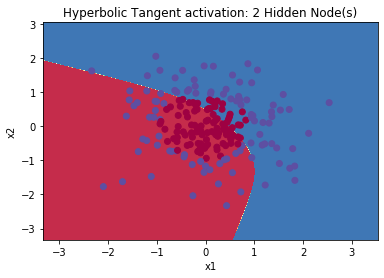

# of hidden nodes: 3
Loss: 0.521893664598465
Accuracy: 79.0%


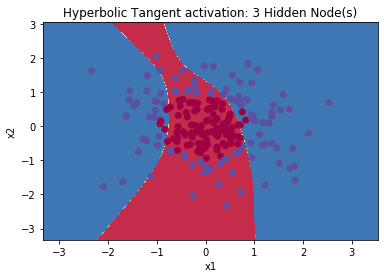

# of hidden nodes: 5
Loss: 0.5494654273986816
Accuracy: 78.0%


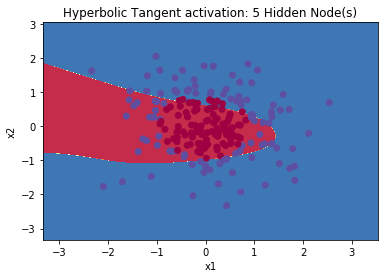

# of hidden nodes: 10
Loss: 0.5876444053649902
Accuracy: 81.5%


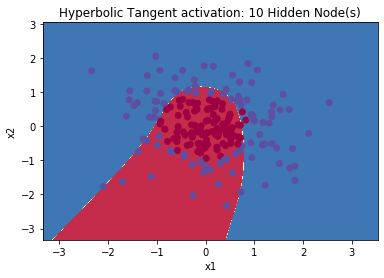

# of hidden nodes: 20
Loss: 0.6048934531211853
Accuracy: 82.0%


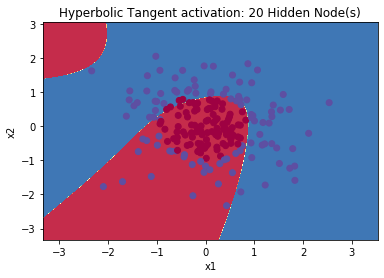

# of hidden nodes: 50
Loss: 0.6710346078872681
Accuracy: 63.5%


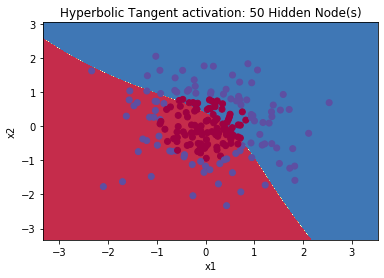

In [9]:
hNodes=[1,2,3,5,10,20,50]

for hNode in hNodes:
    print(f'# of hidden nodes: {hNode}')
    
    model = Sequential([
        Dense(hNode, activation='tanh', input_shape=(2,)),
        Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer='sgd',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(
        X.T,
        Y.T,
        epochs=500,
        batch_size=32,
        verbose=0
    )

    [loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

    print(f"Loss: {loss}")
    print(f"Accuracy: {100*accuracy}%")
    
    plot_decision_boundary(lambda x: model.predict(x), X, Y)
    plt.title(f"Hyperbolic Tangent activation: {hNode} Hidden Node(s)")
    plt.show()

# of hidden nodes: 1
Loss: 0.6951277565956115
Accuracy: 40.0%


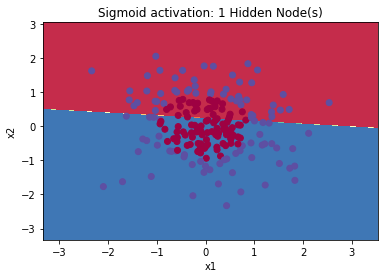

# of hidden nodes: 2
Loss: 0.6852331018447876
Accuracy: 55.00000000000001%


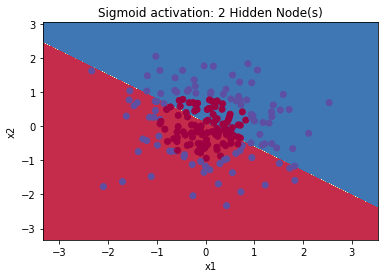

# of hidden nodes: 3
Loss: 0.6858964776992797
Accuracy: 56.00000000000001%


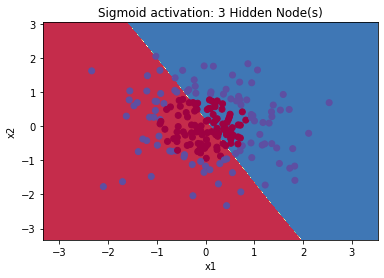

# of hidden nodes: 5
Loss: 0.6897752523422241
Accuracy: 58.5%


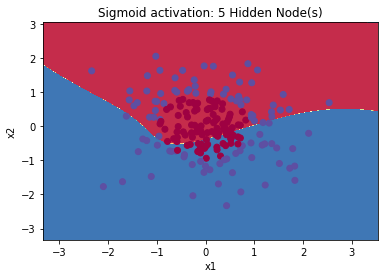

# of hidden nodes: 10
Loss: 0.6868072652816772
Accuracy: 63.5%


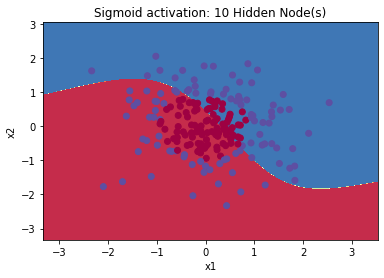

# of hidden nodes: 20
Loss: 0.6888125896453857
Accuracy: 59.5%


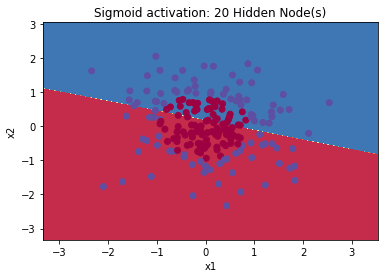

# of hidden nodes: 50
Loss: 0.6882262182235718
Accuracy: 53.0%


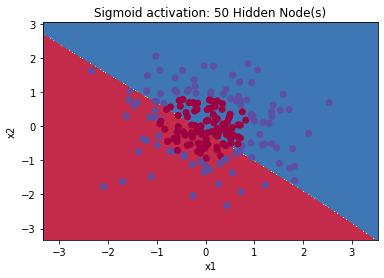

In [10]:
hNodes=[1,2,3,5,10,20,50]

for hNode in hNodes:
    print(f'# of hidden nodes: {hNode}')
    
    model = Sequential([
      Dense(hNode, activation='sigmoid', input_shape=(2,)),
      Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer='sgd',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(
        X.T,
        Y.T,
        epochs=500,
        batch_size=32,
        verbose=0
    )

    [loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

    print(f"Loss: {loss}")
    print(f"Accuracy: {100*accuracy}%")

    plot_decision_boundary(lambda x: model.predict(x), X, Y)
    plt.title(f"Sigmoid activation: {hNode} Hidden Node(s)")
    plt.show()


# of hidden nodes: 1
Loss: 0.6123603296279907
Accuracy: 63.0%


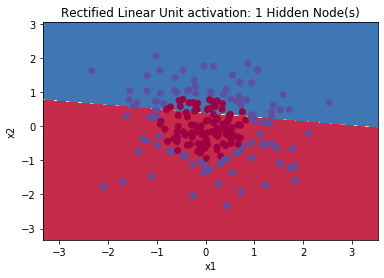

# of hidden nodes: 2
Loss: 0.4911452758312225
Accuracy: 79.5%


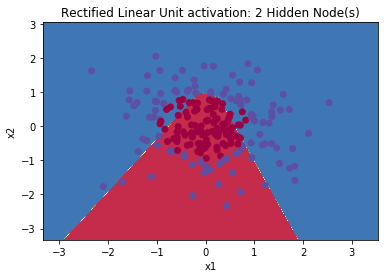

# of hidden nodes: 3
Loss: 0.3200209903717041
Accuracy: 92.0%


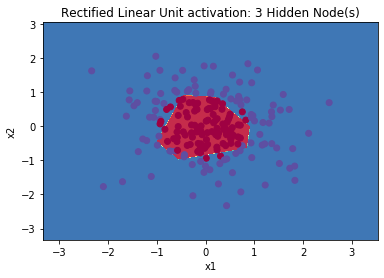

# of hidden nodes: 5
Loss: 0.3385010612010956
Accuracy: 95.0%


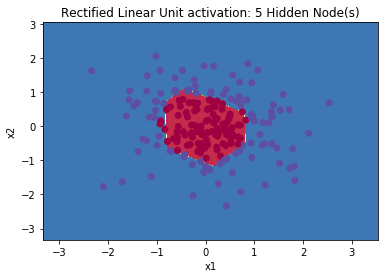

# of hidden nodes: 10
Loss: 0.3462154531478882
Accuracy: 91.5%


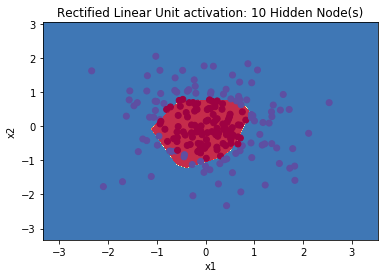

# of hidden nodes: 20
Loss: 0.2873410248756409
Accuracy: 94.5%


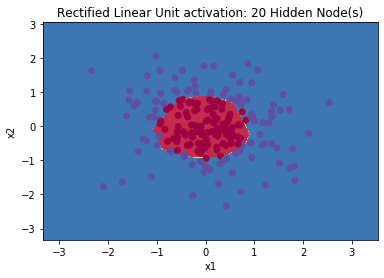

# of hidden nodes: 50
Loss: 0.2953850543498993
Accuracy: 97.0%


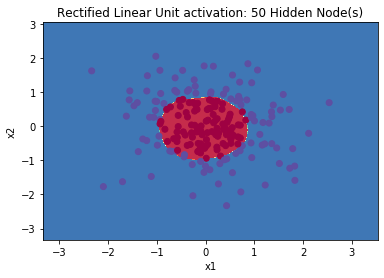

In [11]:
hNodes=[1,2,3,5,10,20,50]

for hNode in hNodes:
    print(f'# of hidden nodes: {hNode}')
    
    model = Sequential([
      Dense(hNode, activation='relu', input_shape=(2,)),
      Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer='sgd',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(
        X.T,
        Y.T,
        epochs=500,
        batch_size=32,
        verbose=0
    )

    [loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

    print(f"Loss: {loss}")
    print(f"Accuracy: {100*accuracy}%")

    plot_decision_boundary(lambda x: model.predict(x), X, Y)
    plt.title(f"Rectified Linear Unit activation: {hNode} Hidden Node(s)")
    plt.show()

# of hidden nodes: 1
Loss: 0.674722101688385
Accuracy: 55.50000000000001%


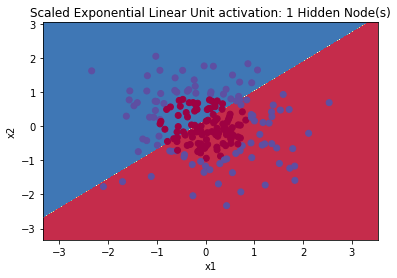

# of hidden nodes: 2
Loss: 0.5495116782188415
Accuracy: 74.5%


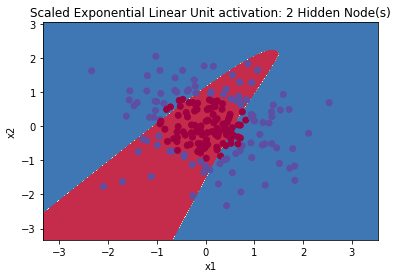

# of hidden nodes: 3
Loss: 0.6605232381820678
Accuracy: 69.5%


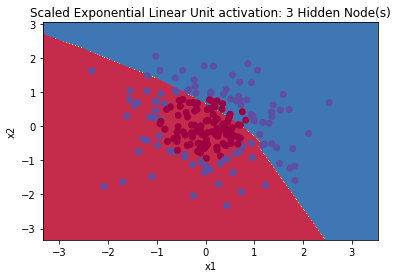

# of hidden nodes: 5
Loss: 0.6016721272468567
Accuracy: 75.0%


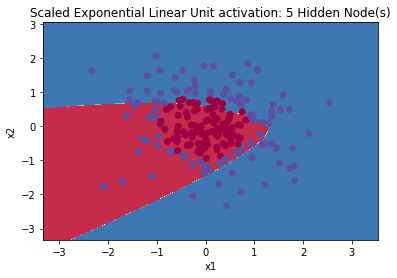

# of hidden nodes: 10
Loss: 0.5890953755378723
Accuracy: 69.5%


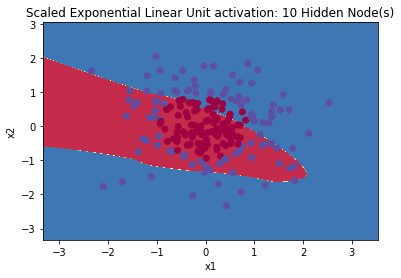

# of hidden nodes: 20
Loss: 0.4945251703262329
Accuracy: 86.0%


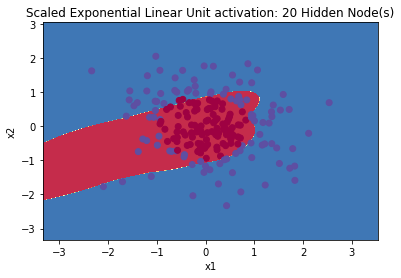

# of hidden nodes: 50
Loss: 0.5848036050796509
Accuracy: 83.0%


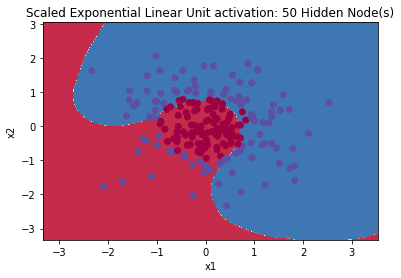

In [17]:
hNodes=[1,2,3,5,10,20,50]

for hNode in hNodes:
    print(f'# of hidden nodes: {hNode}')
    
    model = Sequential([
      Dense(hNode, activation='selu', input_shape=(2,)),
      Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer='sgd',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(
        X.T,
        Y.T,
        epochs=500,
        batch_size=32,
        verbose=0
    )

    [loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

    print(f"Loss: {loss}")
    print(f"Accuracy: {100*accuracy}%")

    plot_decision_boundary(lambda x: model.predict(x), X, Y)
    plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
    plt.show()

# of hidden nodes: 4
Loss: 0.31398840725421906
Accuracy: 89.5%


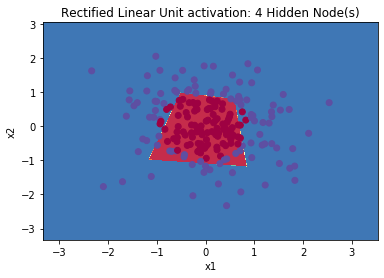

# of hidden nodes: 10
Loss: 0.14436493039131165
Accuracy: 97.5%


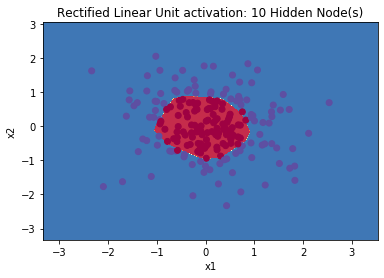

# of hidden nodes: 20
Loss: 0.1156235870718956
Accuracy: 98.5%


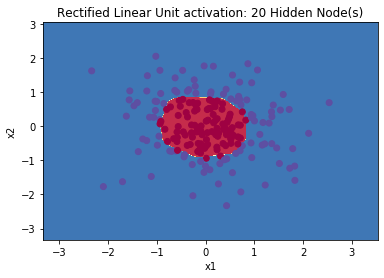

In [15]:
hNodes=[4,10,20]

for hNode in hNodes:
    print(f'# of hidden nodes: {hNode}')
    
    model = Sequential([
      Dense(hNode, activation='relu', input_shape=(2,)),
      Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(
        X.T,
        Y.T,
        epochs=500,
        batch_size=32,
        verbose=0
    )

    [loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

    print(f"Loss: {loss}")
    print(f"Accuracy: {100*accuracy}%")

    plot_decision_boundary(lambda x: model.predict(x), X, Y)
    plt.title(f"Rectified Linear Unit activation: {hNode} Hidden Node(s)")
    plt.show()

# of hidden nodes: 4
Loss: 0.4527060627937317
Accuracy: 77.5%


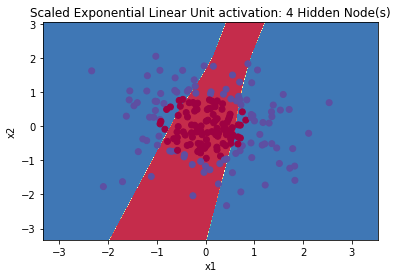

# of hidden nodes: 10
Loss: 0.27712721228599546
Accuracy: 92.0%


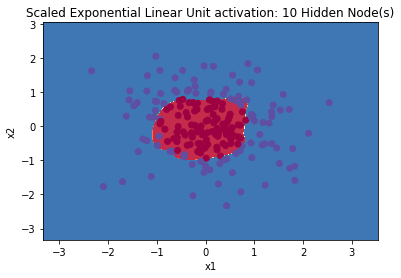

# of hidden nodes: 20
Loss: 0.2453273969888687
Accuracy: 95.5%


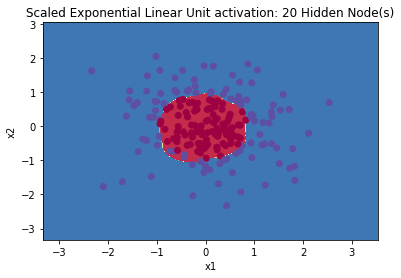

In [19]:
hNodes=[4,10,20]

for hNode in hNodes:
    print(f'# of hidden nodes: {hNode}')
    
    model = Sequential([
      Dense(hNode, activation='selu', input_shape=(2,)),
      Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(
        X.T,
        Y.T,
        epochs=500,
        batch_size=32,
        verbose=0
    )

    [loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

    print(f"Loss: {loss}")
    print(f"Accuracy: {100*accuracy}%")

    plot_decision_boundary(lambda x: model.predict(x), X, Y)
    plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
    plt.show()

# of hidden nodes: 4
Loss: 0.5032307291030884
Accuracy: 76.5%


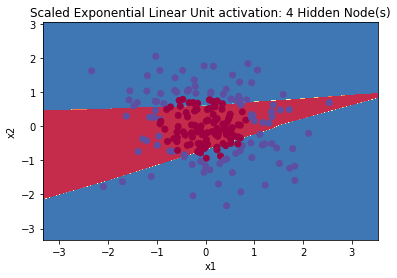

# of hidden nodes: 10
Loss: 0.22321200013160705
Accuracy: 95.5%


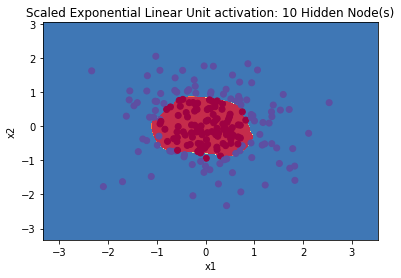

# of hidden nodes: 20
Loss: 0.1300480383634567
Accuracy: 97.5%


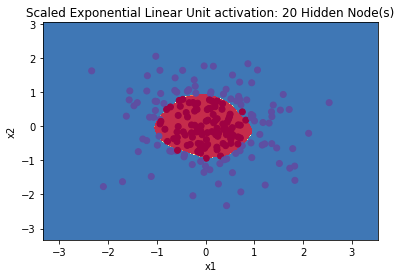

In [20]:
hNodes=[4,10,20]

for hNode in hNodes:
    print(f'# of hidden nodes: {hNode}')
    
    model = Sequential([
      Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
      Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(
        X.T,
        Y.T,
        epochs=500,
        batch_size=32,
        verbose=0
    )

    [loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

    print(f"Loss: {loss}")
    print(f"Accuracy: {100*accuracy}%")

    plot_decision_boundary(lambda x: model.predict(x), X, Y)
    plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
    plt.show()

# of hidden layers: 5
# of hidden nodes: 4
Loss: 0.020337698347866535
Accuracy: 99.5%


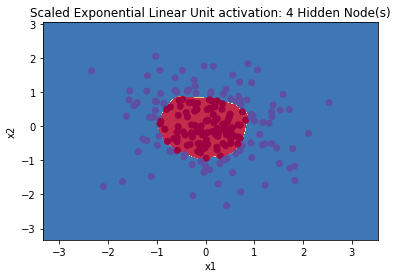

In [22]:
print(f'# of hidden layers: {5}')
hNode=4
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 10
# of hidden nodes per layer
Loss: 0.2792194378376007
Accuracy: 88.5%


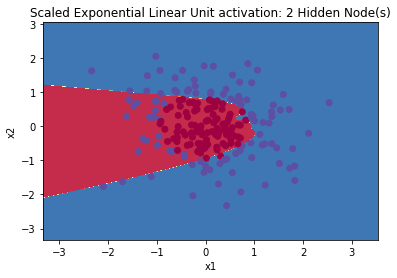

In [23]:
print(f'# of hidden layers: {10}')
hNode=2
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 5
# of hidden nodes per layer
Loss: 0.43697769165039063
Accuracy: 79.0%


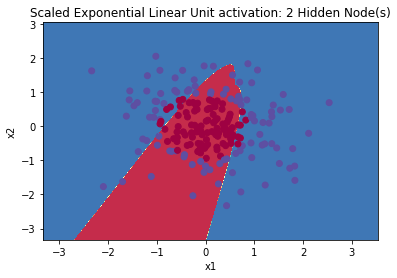

In [24]:
print(f'# of hidden layers: {5}')
hNode=2
print(f'# of hidden nodes per layer')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 2
# of hidden nodes per layer: 5
Loss: 0.08915677785873413
Accuracy: 98.0%


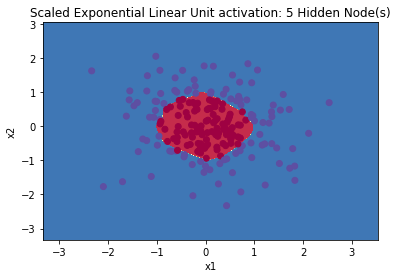

In [27]:
print(f'# of hidden layers: {2}')
hNode=5
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

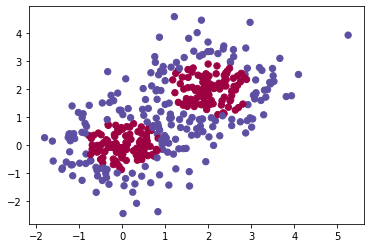

In [28]:
def load_extra_datasets_mixture():  
    N = 200
    gaussian_quantiles1 = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    gaussian_quantiles2 = sklearn.datasets.make_gaussian_quantiles(mean=[2,2], cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles1, gaussian_quantiles2

gaussian_quantiles1, gaussian_quantiles2 = load_extra_datasets_mixture()
X1, Y1 = gaussian_quantiles1
X2, Y2 = gaussian_quantiles2
X, Y = np.concatenate((X1,X2)).T, np.concatenate((Y1,Y2)).reshape(1, 2*Y1.shape[0])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

# of hidden layers: 2
# of hidden nodes per layer: 5
Loss: 0.30616168975830077
Accuracy: 86.5%


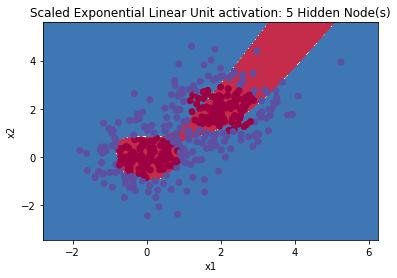

In [29]:
print(f'# of hidden layers: {2}')
hNode=5
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 5
# of hidden nodes per layer: 5
Loss: 0.2993881559371948
Accuracy: 87.75%


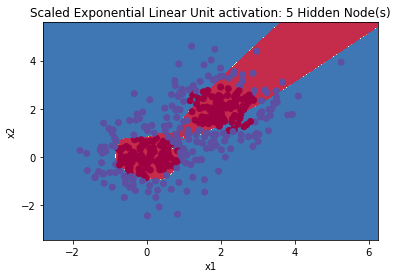

In [32]:
print(f'# of hidden layers: {5}')
hNode=5
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 5
# of hidden nodes per layer: 5
Loss: 0.13310846388339997
Accuracy: 95.5%


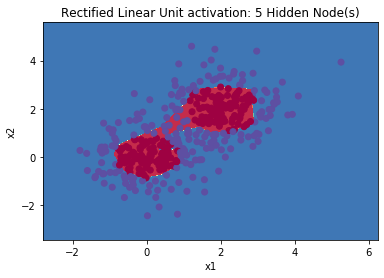

In [33]:
print(f'# of hidden layers: {5}')
hNode=5
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Rectified Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 1
# of hidden nodes per layer: 25
Loss: 0.2981347754597664
Accuracy: 86.0%


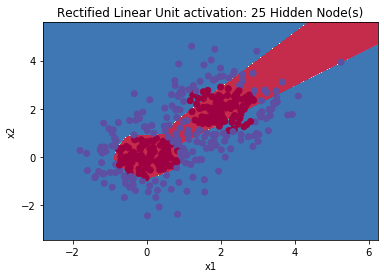

In [34]:
print(f'# of hidden layers: {1}')
hNode=25
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Rectified Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 2
# of hidden nodes per layer: 13
Loss: 0.12345650017261506
Accuracy: 96.5%


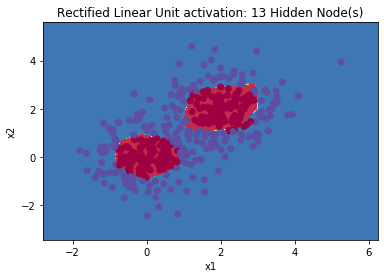

In [35]:
print(f'# of hidden layers: {2}')
hNode=13
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Rectified Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 10
# of hidden nodes per layer: 5
Loss: 0.05036229707300663
Accuracy: 98.75%


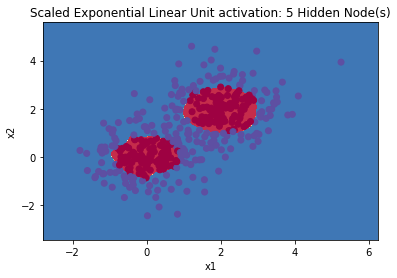

In [36]:
print(f'# of hidden layers: {10}')
hNode=5
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 10
# of hidden nodes per layer: 5
Loss: 0.38524495005607606
Accuracy: 82.75%


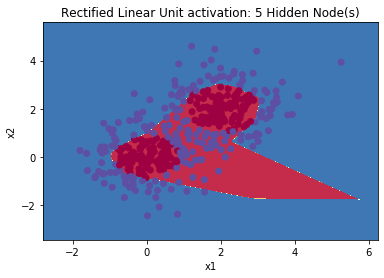

In [37]:
print(f'# of hidden layers: {10}')
hNode=5
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Rectified Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

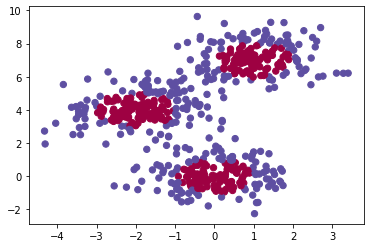

In [38]:
def load_extra_datasets_mixture():  
    N = 200
    gaussian_quantiles1 = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    gaussian_quantiles2 = sklearn.datasets.make_gaussian_quantiles(mean=[-2,4], cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    gaussian_quantiles3 = sklearn.datasets.make_gaussian_quantiles(mean=[1,7], cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles1, gaussian_quantiles2, gaussian_quantiles3

gaussian_quantiles1, gaussian_quantiles2, gaussian_quantiles3 = load_extra_datasets_mixture()
X1, Y1 = gaussian_quantiles1
X2, Y2 = gaussian_quantiles2
X3, Y3 = gaussian_quantiles3
X, Y = np.concatenate((X1,X2)), np.concatenate((Y1,Y2))
X, Y = np.concatenate((X,X3)).T, np.concatenate((Y,Y3)).reshape(1, 3*Y1.shape[0])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

# of hidden layers: 5
# of hidden nodes per layer: 10
Loss: 0.03242240956518799
Accuracy: 98.83333333333333%


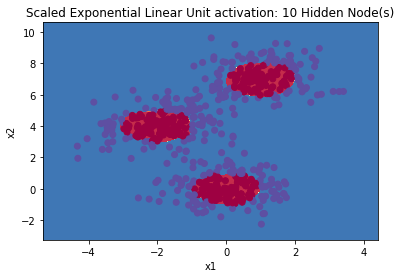

In [43]:
print(f'# of hidden layers: {5}')
hNode=10
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 2
# of hidden nodes per layer: 20
Loss: 0.15335469213624794
Accuracy: 94.99999992052715%


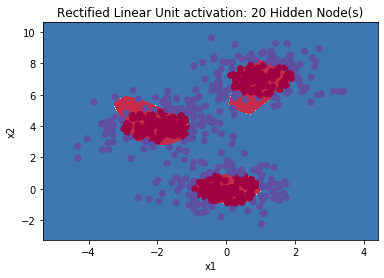

In [44]:
print(f'# of hidden layers: {2}')
hNode=20
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='relu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='relu', kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Rectified Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()

# of hidden layers: 2
# of hidden nodes per layer: 20
Loss: 0.20153183852632842
Accuracy: 91.33333325386047%


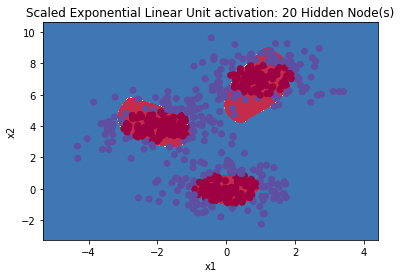

In [45]:
print(f'# of hidden layers: {2}')
hNode=20
print(f'# of hidden nodes per layer: {hNode}')

model = Sequential([
    Dense(hNode, activation='selu', input_shape=(2,), kernel_initializer='lecun_normal'),
    Dense(hNode, activation='selu', kernel_initializer='lecun_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='lecun_normal'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X.T,
    Y.T,
    epochs=500,
    batch_size=32,
    verbose=0
)

[loss, accuracy] = model.evaluate(X.T, Y.T, verbose=0)

print(f"Loss: {loss}")
print(f"Accuracy: {100*accuracy}%")

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title(f"Scaled Exponential Linear Unit activation: {hNode} Hidden Node(s)")
plt.show()